<font size="5">此程式碼為決賽時projectA用fully connected network進行資料分析的展示，因為無法取得比賽資料集所以採用其他資料集來重現程式碼，相關結果僅為展示程式碼，不為比賽時的結果，以下為比賽資料說明。
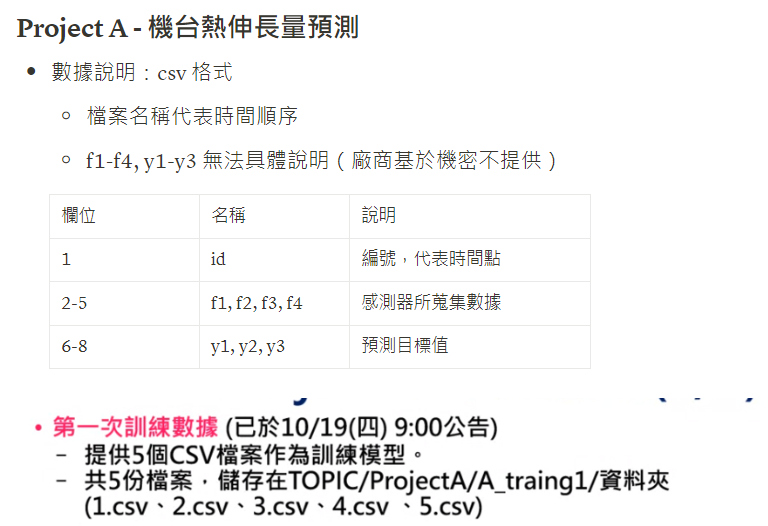

In [1]:
import pandas as pd

data = pd.read_csv('/content/housing.csv').dropna()

In [2]:
data = data.drop(columns = 'ocean_proximity')

In [3]:
data1 = data[0:10000]
data2 = data[10000:]

<font size="5">我們將比賽提供的6份資料集進行合併，並加入source以區分他們的差異，另外，比賽提供的環境無法進行視覺化的資料分析，我們僅能從correlation與其他指標判斷變數間的相關性。

In [4]:
data1['source']=1
data2['source']=2

<ipython-input-4-002804082931>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['source']=1
<ipython-input-4-002804082931>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['source']=2


In [5]:
data2.reset_index(inplace=True)
data2 = data2.drop(columns='index')
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10433 entries, 0 to 10432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           10433 non-null  float64
 1   latitude            10433 non-null  float64
 2   housing_median_age  10433 non-null  float64
 3   total_rooms         10433 non-null  float64
 4   total_bedrooms      10433 non-null  float64
 5   population          10433 non-null  float64
 6   households          10433 non-null  float64
 7   median_income       10433 non-null  float64
 8   median_house_value  10433 non-null  float64
 9   source              10433 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 815.2 KB
None


In [7]:
test = pd.concat([data1,data2], ignore_index=True)

In [8]:
test = pd.get_dummies(test, columns=['source'], prefix=['source'], dtype=int)

In [9]:
import numpy as np
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,source_1,source_2
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1


<font size="5"> 進行分析時，發現對特徵進行標準化會明顯的增加模型的性能，因此先對模型進行Z標準化的動作。

In [12]:
x_col = ['longitude',	'housing_median_age',	'total_rooms', 'total_bedrooms',	'population',	'households']
y_col = ['median_house_value',	'latitude', 'median_income']
x = test[x_col]
y = test[y_col]
x['longitude'] = (x['longitude']-np.mean(x['longitude']))/np.std(x['longitude'])
x['housing_median_age'] = (x['housing_median_age']-np.mean(x['housing_median_age']))/np.std(x['housing_median_age'])
x['total_rooms'] = (x['total_rooms']-np.mean(x['total_rooms']))/np.std(x['total_rooms'])
x['total_bedrooms'] = (x['total_bedrooms']-np.mean(x['total_bedrooms']))/np.std(x['total_bedrooms'])
x['population'] = (x['population']-np.mean(x['population']))/np.std(x['population'])
x['households'] = (x['households']-np.mean(x['households']))/np.std(x['households'])

<ipython-input-12-4a210017b135>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['longitude'] = (x['longitude']-np.mean(x['longitude']))/np.std(x['longitude'])
<ipython-input-12-4a210017b135>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['housing_median_age'] = (x['housing_median_age']-np.mean(x['housing_median_age']))/np.std(x['housing_median_age'])
<ipython-input-12-4a210017b135>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

<font size="5">因為pytorch裡沒有適當的k_fold package，所以這裡自己定義一個函式進行交叉驗證。

In [13]:
def get_kfold_data(k, i, x, y, batch_size=256):
    x = torch.Tensor(np.array(x)).float()
    y = torch.Tensor(np.array(y)).float()
    fold_size = x.shape[0] // k

    val_start = i * fold_size
    if i != k - 1:
        val_end = (i + 1) * fold_size
        x_valid, y_valid = x[val_start:val_end], y[val_start:val_end]
        x_train = torch.cat((x[0:val_start], x[val_end:]), dim = 0)
        y_train = torch.cat((y[0:val_start], y[val_end:]), dim = 0)
    else:
        x_valid, y_valid = x[val_start:], y[val_start:]
        x_train = x[0:val_start]
        y_train = y[0:val_start]

    train_ds = td.TensorDataset(x_train,y_train)
    train_loader = td.DataLoader(train_ds, batch_size=batch_size, shuffle=False, num_workers=1)
    test_ds = td.TensorDataset(x_valid,y_valid)
    Test_loader = td.DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=1)

    return train_loader, Test_loader

In [14]:
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, TensorDataset

In [15]:
import torch
import torch.nn as nn
import torch.utils.data as td

torch.manual_seed(0)

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 2.1.0+cu121


In [ ]:
# train_x = torch.Tensor(x_train).float()
# train_y = torch.Tensor(y_train).float()
# train_ds = td.TensorDataset(train_x,train_y)
# train_loader = td.DataLoader(train_ds, batch_size=200,shuffle=False, num_workers=1)

# test_x = torch.Tensor(x_test).float()
# test_y = torch.Tensor(y_test).float()
# test_ds = td.TensorDataset(test_x,test_y)
# test_loader = td.DataLoader(test_ds, batch_size=200,shuffle=False, num_workers=1)

# print('Ready to load data')

Ready to load data


<font size="5">下面的Model僅為展示，不為比賽當天用的模型，比賽當天用的模型已展示在簡報裡

In [22]:
hidden_layer = 16

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(in_features=len(x_col), out_features=hidden_layer)
        #self.fc2 = nn.Linear(in_features=hidden_layer, out_features=hidden_layer)
        self.fc3 = nn.Linear(in_features=hidden_layer, out_features=len(y_col))

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        #x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return x

model = Model()
print(model)

Model(
  (fc1): Linear(in_features=6, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=3, bias=True)
)


In [17]:
class RMSELoss(nn.Module):
    def __init__(self):
        super(RMSELoss, self).__init__()

    def forward(self, y_pred, y_true):
        mse = nn.MSELoss()(y_pred, y_true)
        rmse = torch.sqrt(mse)
        return rmse

In [19]:
#loss_func(torch.Tensor([[1,2,3],[7,7,7],[7,7,7],[7,7,7]]),torch.Tensor([[1,4,5],[6,6,6],[7,7,7],[7,7,7]]))

In [20]:
from sklearn.metrics import r2_score
loss_func = RMSELoss()
def train(model, data_loader, optimizer):
    model.train()
    train_loss = 0

    for batch, tensor in enumerate(data_loader_train):
        data, target = tensor
        optimizer.zero_grad()
        out = model(data)
        loss = loss_func(out, target)
        train_loss += loss.item()

        loss.backward()
        optimizer.step()
        avg_loss = train_loss/(batch+1)

    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    #print('Training set: {} Fold Average loss: {:.6f}'.format(k_fold, sum(k_fold_loss)/k_fold))

    return avg_loss


def test(model, data_loader):
    model.eval()
    test_loss = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            out = model(data)

            test_loss += loss_func(out, target).item()


    avg_loss = test_loss/batch_count
    if epochs % 5 == 0:
      print('Validation set: Average loss: {:.6f}\n'.format(avg_loss), end='')
      r2 = r2_score(target, out, multioutput='raw_values')
      print('Overall R^2:', r2)
    return avg_loss

In [21]:
learning_rate = 0.1
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

epoch_nums = []
#training_loss = []
validation_loss = []
k_fold_loss = []

epochs = 10
min_loss = float('inf')
k_fold = 5

for i in range(k_fold):
    model = Model()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    optimizer.zero_grad()
    print("="*20,f"第{i+1}fold","="*20)
    data_loader_train, data_loader_test = get_kfold_data(k_fold, i, x, y, batch_size=256)
    validation_loss = []
    for epoch in range(1, epochs + 1):

        print('Epoch: {}'.format(epoch))

        train_loss = train(model, data_loader_train, optimizer)

        test_loss = test(model, data_loader_test)

        # if test_loss < min_loss:
        #   min_loss = test_loss
        #   print('save model')
        #   torch.save(model.state_dict(),'save.pt')

        #epoch_nums.append(epoch)
        validation_loss.append(test_loss)
    k_fold_loss.append(validation_loss[-1])
    if validation_loss[-1] < min_loss:
      min_loss = validation_loss[-1]
      print('save model')
      torch.save(model.state_dict(),f'save_fold{i+1}.pt')


print(k_fold_loss)

==================== 第1fold ====================
Epoch: 1
Training set: Average loss: 134548.573059
Validation set: Average loss: 104528.557861
Overall R^2: [-8.30316310e+00 -2.74127469e+05 -6.21194778e+00]
Epoch: 2
Training set: Average loss: 132434.470581
Validation set: Average loss: 101071.079102
Overall R^2: [-7.91573725e+00 -9.54286391e+05 -6.21194778e+00]
Epoch: 3
Training set: Average loss: 127331.655518
Validation set: Average loss: 94828.611328
Overall R^2: [-7.23636726e+00 -1.63904687e+06 -6.21194778e+00]
Epoch: 4
Training set: Average loss: 119683.925110
Validation set: Average loss: 86665.750977
Overall R^2: [-6.36877475e+00 -1.63904687e+06 -6.21194778e+00]
Epoch: 5
Training set: Average loss: 110700.696777
Validation set: Average loss: 78384.747070
Overall R^2: [-5.46839186e+00 -1.63904687e+06 -6.21194778e+00]
Epoch: 6
Training set: Average loss: 101940.064056
Validation set: Average loss: 72276.330933
Overall R^2: [-4.66735852e+00 -1.63904687e+06 -6.21194778e+00]
Epoch: 

In [23]:
torch.save(model.state_dict(), 'save1.pt')
model.load_state_dict(torch.load('save1.pt'))

<All keys matched successfully>